# Open data of ${}^{60}$Co
Author:

J. Angevaare // <j.angevaare@nikhef.nl> // 2020-05-25

Below we:
 - read a file of ${}^{60}$Co-data
 - Plot ${}^{60}$Co spectrum 

## Open the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Let's look at the first root file in the list above
path = '../data/Co60_sample.csv'

In [3]:
co60 = pd.read_csv(path)

In [4]:
co60

,channel,integral,time
0,5,1258.48970,3.787286e+09
1,4,1328.03430,3.787286e+09
2,4,1211.03720,3.787286e+09
3,4,893.12225,3.787286e+09
4,5,241.21430,3.787286e+09
...,...,...,...
99995,4,1379.15210,3.787287e+09
99996,5,777.09750,3.787287e+09
99997,4,1734.06140,3.787287e+09
99998,4,1367.85340,3.787287e+09


## plot a ${}^{60}$Co spectrum
Below we have a look at the data we have just loaded to create a spectrum. This is similar to what we showed in the video but with higher resolution and higher statistics.

As you have read in the instrumentation paper, each of the sources is sandwiched between two NaI(Tl) crystals which is each read out by a PMT. In the case of ${}^{60}$Co these happen to be channels `4 and 5`. Below we make a simple plot of such a spectrum. We do this by extracting the 'integral' field of the data as illustrated above and making a histogram of these values. This shows the calibrated energy of each event combined into a histogram to form the spectrum.
  - Can you explain why we would refer to the energy as 'integral'?
  - Below we plot the spectra of these two detectors (monitoring the exact same source from either side). Can you explain the features? (Not limited to just the red and blue lines, e.g. what other peaks do you see and can you explain them?)
  

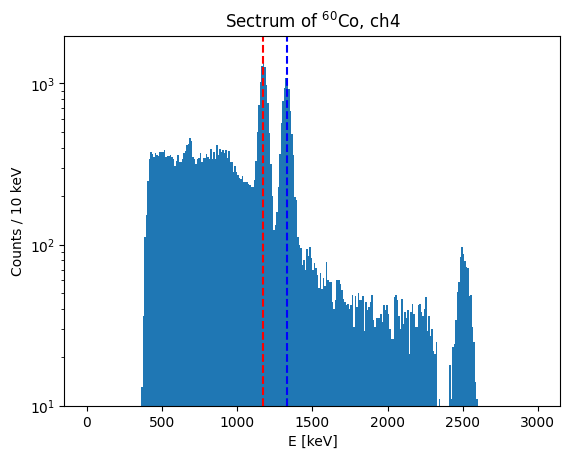

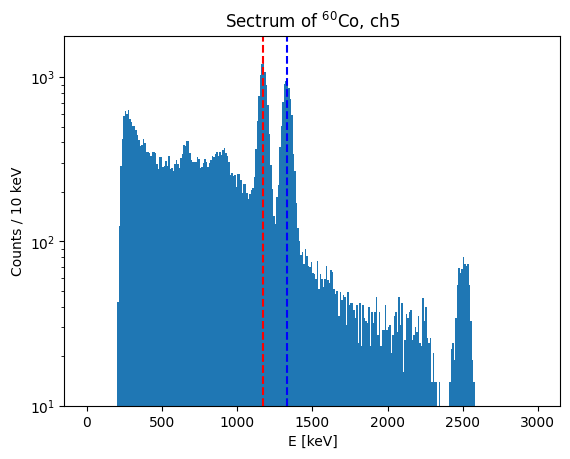

In [5]:
for ch in np.unique(co60['channel']):
    plt.title('Spectrum of ${}^{60}$Co'f', ch{ch}')
    selection = (co60['channel']==ch)
    plt.hist(co60[selection]['integral'].values, bins = 300, range=[0,3000])
    plt.yscale('log')
    plt.ylim(10,plt.ylim()[-1])
    plt.axvline(1173.2, c = 'r', linestyle = '--')
    plt.axvline(1332.5, c = 'b', linestyle = '--')
    plt.xlabel('E [keV]')
    plt.ylabel('Counts / 10 keV')
    plt.show()